<a href="https://colab.research.google.com/github/DammuNikhitha/AI-ML-Internship-Task-2/blob/main/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1 : Loading the dataset

In [3]:
df=pd.read_csv("houseprice.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Identify Missing Values
Identify which columns contain missing values using .isnull().sum()

In [5]:
df.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


# Step 2 : Visualize missing data (bar charts)

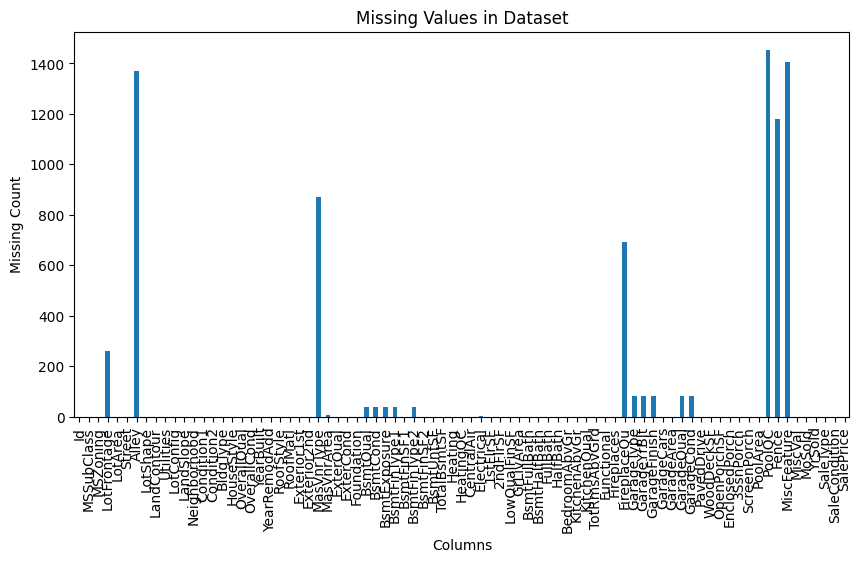

In [7]:
df.isnull().sum().plot(kind='bar',figsize=(10,5))
plt.title("Missing Values in Dataset")
plt.xlabel("Columns")
plt.ylabel("Missing Count")
plt.show()

In [8]:
df=pd.read_csv("houseprice.csv")
df_before=df.copy() #original dataset copy
print("Dataset shape BEFORE cleaning:", df_before.shape)

Dataset shape BEFORE cleaning: (1460, 81)


#  Step 3 : Handle Missing Values (Numerical Columns)
Method Used: Median Imputation

In [9]:
num_cols = df.select_dtypes(include=['int64','float64']).columns

for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

Missing values in numerical columns were handled using median imputation.
The operation updates the dataset in-place and therefore does not generate visible output.

*  Modifies the dataset silently
*   fillna() does not return printed output
*   So Colab shows no output cell


# Step 4 : Categorical Columns
Method Used : Mode Imputation

Mode imputation was applied to categorical features to replace missing values with the most frequent category.

In [10]:
cat_cols=df.select_dtypes(include=['object']).columns
for col in cat_cols:
  df[col]=df[col].fillna(df[col].mode()[0])

**Since no missing values were found in numerical or categorical columns, imputation techniques such as mean, median, or mode were not required for this dataset.**

# Step 5 : Remove Columns with High Missing Values

Remove columns having more than 50% missing data.

In [11]:
threshold=len(df)*0.5
df=df.dropna(thresh=threshold,axis=1)

No columns were removed as there were no columns with high missing vales.

# Step 6 : Validate Dataset After Cleaning

In [12]:
df.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,0
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


# Step 7 : Compare Dataset Before & After Cleaning

In [14]:
print("Dataset shape BEFORE cleaning:", df_before.shape)
print("Dataset shape AFTER cleaning:", df.shape)
df.isnull().sum().sum()

Dataset shape BEFORE cleaning: (1460, 81)
Dataset shape AFTER cleaning: (1460, 81)


np.int64(0)

The dataset was compared before and after the cleaning process.
Since missing values were handled using statistical imputation techniques rather than row or column removal, the overall dataset shape remained unchanged.
However, data quality improved as all missing values were successfully resolved.

In [15]:
print("Missing values BEFORE cleaning:")
print(df_before.isnull().sum().sum())

print("Missing values AFTER cleaning:")
print(df.isnull().sum().sum())

Missing values BEFORE cleaning:
7829
Missing values AFTER cleaning:
0


**The dataset was successfully cleaned by identifying and handling missing values using median and mode imputation techniques.
No rows or columns were removed, preserving the original dataset structure while ensuring complete and consistent data suitable for further analysis.**